# Algebra lineal con **SciPy**

Referencias:

* https://docs.scipy.org/doc/scipy/reference/linalg.html
* https://www.datacamp.com/cheat-sheet/scipy-cheat-sheet-linear-algebra-in-python

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** Inversa de una matriz

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv

**1)** Use `linalg.inv()` para calcular la inversa $A^{-1}$ de la matriz

\begin{equation}
A = \bigg(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\bigg)
\end{equation}

**2)** Use `np.dot()` para chequear que $A^{-1}A \approx \mathbb{I}$, donde $\mathbb{I}$ es la matriz identidad.

**3)** Chequee que $AA^{-1} \approx \mathbb{I}$.

In [2]:
# 2.1)
A = np.array([[1,2], [3, 4]])

In [3]:
# 2.2)
A_inv = linalg.inv(A)
A_inv = np.array(A_inv)

In [4]:
# 2.3) 
np.dot(A, A_inv)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

## **Ejercicio 3)** Sistema de ecuaciones lineales

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

**1)** Use `linalg.solve()` para resolver el sistema $Ax=b$ donde, $x$ es la incógnita,

\begin{equation}
A = \left(
\begin{array}{cc}
3 & 2 & 0 \\
1 & -1 & 0 \\
0 & 5 & 1
\end{array}
\right)
\end{equation}

y

\begin{equation}
b = \left(
\begin{array}{cc}
2 \\
4 \\
1
\end{array}
\right)
\end{equation}

**2)** Chequee que $Ax=b$.

In [5]:
# 3.1)
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([[2], [4], [1]])
x = linalg.solve(A, b)
x

array([[ 2.],
       [-2.],
       [11.]])

In [6]:
# 3.2)
np.dot(A, x)

array([[2.],
       [4.],
       [1.]])

## **Ejercicio 4)** Cuadrados mínimos

Dada una matriz $X$ de dimensiones $n\times m$ y un vector $y$ de dimensión $n$, la función `linalg.lstsq(X,y,...)` se usa para encontrar el vector $y$ de dimensión $m$ que minimize la norma L2 dada por $|y-Xc|$ con respecto al vector $c$ de dimensión $m$. Notar que minimizar esta cantidad no necesariamente implica que $Xc=y$. Minimizar $|y-Xc|$ es útil para infinidad de problemas. En particular, es útil para ajustar polinomios a curvas obtenidas de datos.

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq

**1)** Use `linalg.lstsq(X,y)` para encontrar los coeficientes $c_0$, $c_1$ y $c_2$ del polinomio $p(x)=c_0+c_1x+c_2x^2$ que ajuste lo mejor posible los siguientes datos

    x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
    y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

de acuerdo al método de cuadrados mínimos

\begin{equation}
\min_{c_0,c_1,c_2} \sum_i (y_i-p(x_i))^2
\end{equation}

**Ayuda:** Utilizar la matriz $X$ de entradas $X_{ij}=x_i^j$, i.e. la $j$-ésima potencia de $x_i$.

**2)** Con el fin de evaluar la bondad del ajuste, grafique en una misma figura:

* con símbolos los puntos $(x_i,y_i)$, y
* con una curva el polinomio ajustado $p(x)$ vs $x$.

In [7]:
# 4.1)
x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

X = np.row_stack([np.ones_like(x), x, x**2]).T
X

array([[ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  7.  , 49.  ],
       [ 1.  ,  8.5 , 72.25]])

In [8]:
c, res, rng, sng = linalg.lstsq(X, y)
print(f'Coeficientes: c0={c[0]:.2f}, c1={c[1]:.2f}, c2={c[2]:.2f}')

Coeficientes: c0=0.06, c1=0.08, c2=0.11


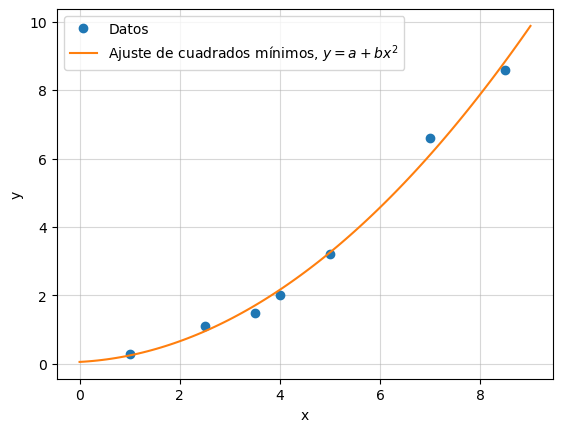

In [9]:
# 4.2)
plt.plot(x, y, 'o', label='Datos')
xx = np.linspace(0, 9, 101)
yy = c[0] + c[1]*xx+c[2]*xx**2
plt.plot(xx, yy, label='Ajuste de cuadrados mínimos, $y = a + bx^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.50)
plt.show()

## **Ejercicio 5)** pseudo-inversa de Moore-Penrose de una matriz

La pseudo-inversa de Moore-Penrose es una generalización de la noción de inversa, que resulta útil porque existe para cualquier matriz de dimensiones y entradas arbitrarias sobre los números reales o complejos.

Si una matriz $A$ es invertible (y por ende cuadrada), existe una matriz $B$ tal $AB=BA=\mathbb{I}$. Dicha matríz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^{-1}$ y se la denomina inversa de $A$.

Si $A$ no es invertible, luego no existe una matriz $B$ para la cual se cumpla la primera condición $AB=BA=\mathbb{I}$. Sin embargo, se puede ver que siempre existe una matriz $B$ para la cual se cumple:

* $ABA = A$,
* $BAB=B$,
* $AB$ es hermitiana, y
* $BA$ es hermitiana.

Dicha matriz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^+$ y se la denomina matríz pseudo-inversa de Moore-Penrose de $A$.

Referencias:

* https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv

**1)** Cree una matriz $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$ de números aleatorios generados a partir de la distribución normal de media 0 y varianza 1.

**2)** Use `linalg.pinv()` para computar la psuedo-inversa de Moore-Penrose $A^+$ de $A$.

**3)** Que dimensiones tiene $A^+$?

**4)** Use `np.allclose()` para verifique que $AA^+A\approx A$.

**5)** Verifique que $A^+AA^+\approx A^+$.

In [10]:
# 5.1)

seed = 27
n, m = 9, 6
np.random.seed(seed)
# Genera números con distribución normal de media 0 y varianza 1
A = np.random.randn(n, m) 

In [11]:
# 5.2)
A_pinv = linalg.pinv(A)

In [12]:
# 5.3)
print(f'Dimensiones de A+: {A_pinv.shape}')

Dimensiones de A+: (6, 9)


In [13]:
# 5.4)
print('AA+A ≈ A')
# @ realiza una multiplicación matricial estándar 
print(f'Es correcto? {np.allclose(A, A @ A_pinv @ A)}') 

AA+A ≈ A
Es correcto? True


In [14]:
# 5.5)
print('A+AA+ ≈ A+')
# @ realiza una multiplicación matricial estándar 
print(f'Es correcto? {np.allclose(A_pinv, A_pinv @ A @ A_pinv)}') 

A+AA+ ≈ A+
Es correcto? True


## **Ejercicio 6)** Producto de Kronecker

Considere las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
A_{11} & \dots & A_{1m} \\
\vdots & \ddots & \vdots \\
A_{nm} & \dots & A_{nm}
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
B_{11} & \dots & B_{1s} \\
\vdots & \ddots & \vdots \\
B_{r1} & \dots & B_{rs}
\end{array}
\right)
\end{equation}

El producto de Kronecker es la matriz de dimensiones $nr\times ms$ dada por

\begin{equation}
A\otimes B
=
\left(
\begin{array}{cc}
A_{11}B & \dots & A_{1m}B \\
\vdots & \ddots & \vdots \\
A_{n1}B & \dots & A_{nm}B
\end{array}
\right)
=
\left(
\begin{array}{cc}
B_{11}A & \dots & B_{1s}A \\
\vdots & \ddots & \vdots \\
B_{r1}A & \dots & B_{rs}A
\end{array}
\right)
\end{equation}

donde $A_{ij}B$ es un bloque de la matriz $A\otimes B$ igual al producto del escalar $A_{ij}$ por la matriz $B$.
Idem para $B_{ij}A$.

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.kron.html#scipy.linalg.kron

**1)** Use `linalg.kron()` para calcular el producto de Kronecker de las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 \\
1 \\
1 \\
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este caso?

**2)** Repita para las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 & 1 & 1
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este otro caso?

In [15]:
# 6.1)

A = np.array([[1, 2], [3, 4]])
B = np.ones((3, 1))

C = linalg.kron(A, B)
print(f'Dimensiones de A x B: {C.shape}')


Dimensiones de A x B: (6, 2)


In [16]:
# 6.2)

A = np.array([[1, 2], [3, 4]])
B = np.ones((1, 3))

C = linalg.kron(A, B)
print(f'Dimensiones de A x B: {C.shape}')

Dimensiones de A x B: (2, 6)


## **Ejercicio 7)** Autovalores y autovectores

Considere una matriz $A$ de $n\times m$. Luego, existen un conjunto de escalares $\{\lambda_1,...,\lambda_n\}$ y un correspondiente conjunto de vectores distintos $\{v_1,...,v_n\}$ tales que

\begin{equation}
Av_i = \lambda_i v_i \;\;\;\; (1)
\end{equation}

para todo $i\in\{1,...,n\}$. Estos $\lambda_i$ y $v_i$ se denominan autovalores y autovectores a derecha de $A$, respectivamente. Los autovalores pueden repetirse, pueden ser nulos y se los suele ordenar de mayor a menor en orden descendiente de sus valores absolutos: $|\lambda_1|\geq |\lambda_2|\geq ...\geq |\lambda_n|\geq 0$. Los autovectores pueden normalizarse, ya que si $v_i$ es autovector, luego $v_i/|v_i|$ también lo es.

Los autovectores constituyen una base del dominio de $A$. Esto es muy útil porque permite escribir cualquier vector $v$ en el dominio de $A$ como una combinación linal de sus autovectores

\begin{equation}
v = \sum_i c_i v_i
\end{equation}

Luego, calcular el producto de $A$ con $v$ resulta muy simple

\begin{equation}
Av = A\left(\sum_i c_i v_i\right) = \sum_i c_iAv_i = \sum_i c_i\lambda_iv_i
\end{equation}

Análogamente, existen un conjunto de escalares $\{\mu_1,...,\mu_m\}$ y un correspondiente conjunto de vectores diferentes $\{u_1,...,u_m\}$ de $A$, llamados autovalores y autovectores a izquierda de $A$, respectivamente, y son tales que

\begin{equation}
u_jA = \mu_j u_j \;\;\;\; (2)
\end{equation}

para todo $j\in\{1,...,m\}$.

**1)** Use `linalg.eigvals()` para calcular los autovalores a derecha de la matriz

\begin{equation}
A = \left(
\begin{array}{cc}
0 & -1 \\
1 &  0
\end{array}
\right)
\end{equation}

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig

**2)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a derecha de $A$.

**3)** Verifique que la ecuación $(1)$ se cumple.

**4)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a izquierda de $A$.

**5)** Verifique que la ecuación $(2)$ se cumple.

In [17]:
# 7.1)

A = np.array([[0, -1], [1, 0]])
linalg.eigvals(A)

array([0.+1.j, 0.-1.j])

In [18]:
# 7.2)

aval, avect = linalg.eig(A)
print(aval)
print(avect)

[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [19]:
# 7.3) 

for i in range(len(aval)):
    Av = np.dot(A, avect[:, i])
    lv = aval[i] * avect[:, i]
    print(f'Es correcto {i+1}? {np.allclose(Av, lv)}') 

Es correcto 1? True
Es correcto 2? True


In [20]:
# 7.4)

aval, avect_izq = linalg.eig(A, left=True, right=False)
print(aval)
print(avect)

[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [21]:
# 7.5)

for i in range(len(aval)):
    Av_izq = np.dot(A, avect_izq[:, i])
    lv = aval[i] * avect_izq[:, i]
    print(f'Es correcto {i+1}? {np.allclose(Av_izq, lv)}') 

Es correcto 1? True
Es correcto 2? True


## **Ejercicio 8)** Singular Value Decomposition (SVD)

Una matriz compleja $A$ de dimensiones $n\times m$ se la puede pensar como una transformación lineal $A:V\to W$ desde un espacio vectorial $V$ de dimensión $m$ a un espacio vectorial $W$ de dimensión $n$.
A $V$ se lo suele llamar espacio de salida y a $W$ espacio de llegada.

Cualquiera sea $A$, siempre existen matrices $L$, $D$ y $R$, de dimensiones $n\times n$, $n\times m$ y $m\times m$, respectivamente, tales que $L$ y $R$ son unitarias, $D$ es diagonal y

\begin{equation}
A = LDR^{\dagger} \;\;\;\; (1)
\end{equation}

Los valores diagonales

\begin{equation}
\sigma_i := D_{ii}
\end{equation}

están definidos para todo $i\in \{1,...,k\}$, donde $k=\min(n,m)$,
se los denomina valores singulares de $A$, son todos reales y no-negativos.
La descomposición siempre puede realizarse de manera tal que $\sigma_1\geq \sigma_2 \geq ... \geq \sigma_k\geq 0$.
El número de valores singulares no nulos es el rango de $A$.

Los vectores columna $l_1,...,l_n$ de $L$ forman una base ortonormal del espacio vectorial de llegada $W$.
Los vectores columna $r_1,...,r_m$ de $R$ forman una base ortonormal del espacio vectorial de salida $V$.
Usando estas propiedades, la ecuación $(1)$ puede reescribirse como

\begin{equation}
A = \sum_{i=1}^k \sigma_i \, (l_i \otimes r_i^{\dagger}) \;\;\;\; (2)
\end{equation}

donde $l_i \otimes r_i^{\dagger}$ es la matriz de dimensiones $n\times m$ resultante del producto de Kronecker entre la matriz $l_i$ de dimensiones $n\times 1$ y la matriz $r_i^{\dagger}$ de dimensiones $1\times m$.

Referencias:

* https://en.wikipedia.org/wiki/Singular_value_decomposition
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd

**1)** Cree una matriz compleja $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$, cuyas entradas $a_{ij} = x_{ij} + i y_{ij}$ se computen generando números aleatorios $x_{ij}$ e $y_{ij}$ a partir de una distribución normal de media 0 y varianza 1.

**2)** Use `linalg.svd()` para calcular la SVD de $A$. Dicha función retorna 3 arrays, digamos `L`, `s` y `Rc`, donde `L` denota a la matriz $L$, `s` denota al vector de valores singulares $(\sigma_1,\sigma_2,...,\sigma_k)$ y `Rc` denota a la matriz compleja conjugada $R^{\dagger}$.
Inspeccione las dimensiones de los arrays retornados.

**3)** Use el vector `s` para crear la matriz diagonal $D$ de dimensiones $n\times m$.

**4)** Use `np.allclose()` para verificar numéricamente la ecuación $(1)$.

In [22]:
# 8.1)
seed = 27
n, m = 9, 6
np.random.seed(seed)
A = np.random.randn(n, m) 

In [23]:
# 8.2)

L, s, Rc = linalg.svd(A)

print(f'Dimension de L  : {L.shape}')
print(f'Dimension de s  : {s.shape}')
print(f'Dimension de Rc : {Rc.shape}')

Dimension de L  : (9, 9)
Dimension de s  : (6,)
Dimension de Rc : (6, 6)


In [24]:
# 8.3)

D = np.zeros((n, m))#, dtype=complex)
np.fill_diagonal(D, s)
print(f'Dimension de D: {D.shape}')

Dimension de D: (9, 6)


In [25]:
# 8.4)

Ap = np.dot(L, np.dot(D, Rc))
print(f'Es correcto? {np.allclose(A, Ap)}')

Es correcto? True
